# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data /content/drive/MyDrive/Colab Notebooks/CardioGoodFitness.csv
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/week2/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
df.shape

(1898, 9)

Observations:  the shape is 1898 rows and 9 columns

```
# This is formatted as code
```




### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: object, int64, float64


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: there are 0 N/a values


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
df.describe(include = "all")


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898,1898,1898.000000,1898,1898,1898.000000,1898.000000
unique,NaN,NaN,178,14,NaN,2,4,NaN,NaN
top,NaN,NaN,Shake Shack,American,NaN,Weekend,Not given,NaN,NaN
freq,NaN,NaN,219,584,NaN,1351,736,NaN,NaN
mean,1.477496e+06,171168.478398,NaN,NaN,16.498851,NaN,NaN,27.371970,24.161749
std,5.480497e+02,113698.139743,NaN,NaN,7.483812,NaN,NaN,4.632481,4.972637
min,1.476547e+06,1311.000000,NaN,NaN,4.470000,NaN,NaN,20.000000,15.000000
25%,1.477021e+06,77787.750000,NaN,NaN,12.080000,NaN,NaN,23.000000,20.000000
50%,1.477496e+06,128600.000000,NaN,NaN,14.140000,NaN,NaN,27.000000,25.000000
75%,1.477970e+06,270525.000000,NaN,NaN,22.297500,NaN,NaN,31.000000,28.000000


#### Observations: the max time is a 35 minutes, average is 27.372, min is 20 minutes


### **Question 5:** How many orders are not rated?

In [ ]:
(df['rating'] == "Not given").sum()

736

#### Observations:  736 orders were not rated


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

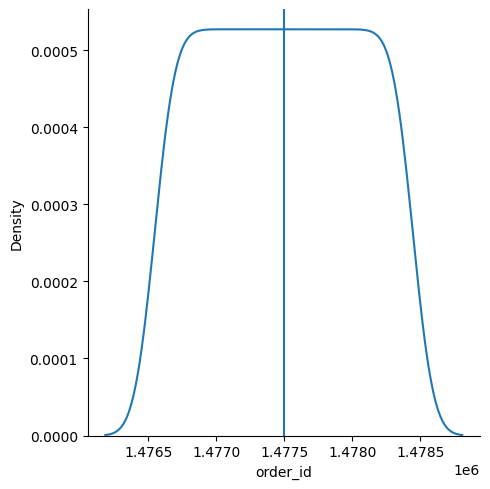

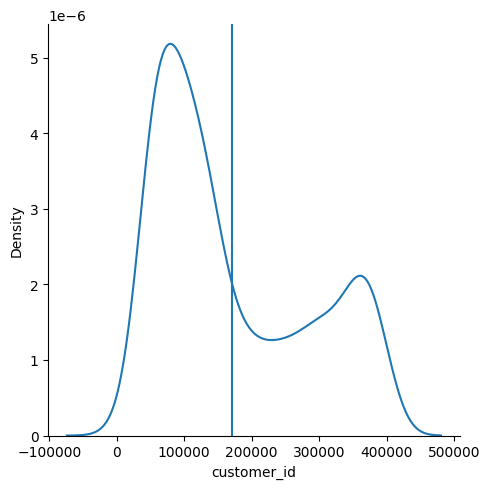

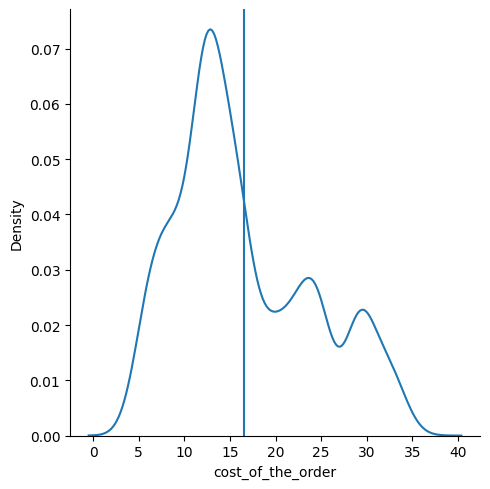

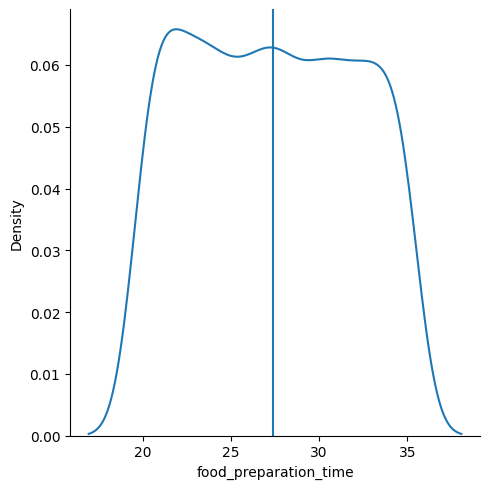

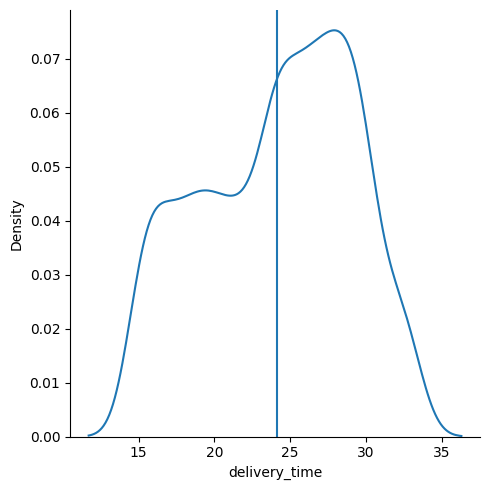

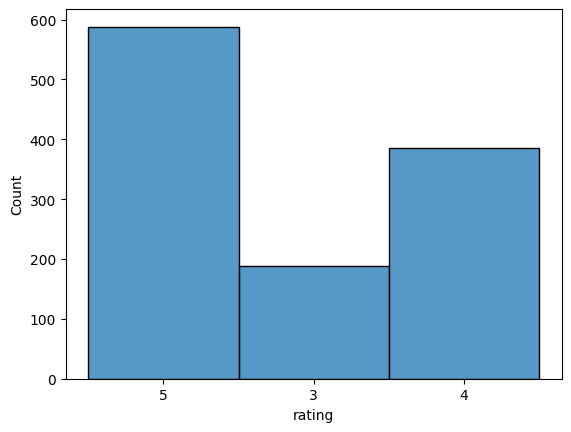

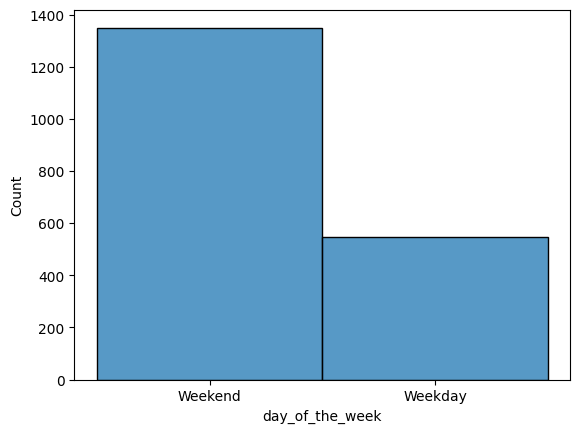

<Axes: xlabel='cuisine_type', ylabel='count'>

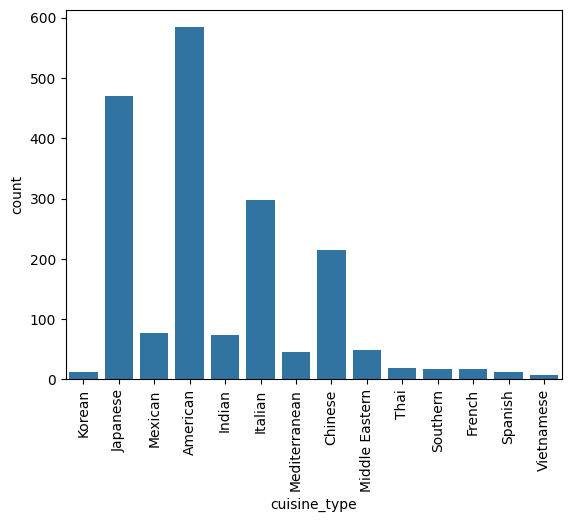

In [ ]:
#only numerical data
newdf = df.select_dtypes(include= np.number)
cols = newdf.columns.tolist()

#show the distribution of all numerical data
for col in cols:
  sns.displot(df[col], kind = 'kde')
  mean = df[col].mean()
  plt.axvline(mean)
  plt.show()

# show usual ratings
sns.histplot(df[df["rating"] != "Not given"], x = "rating")
plt.show()

#show orders on days of the week vs weekend
sns.histplot(df, x = "day_of_the_week")
plt.show()

#most popular cuisine
plt.xticks(rotation = 90)
sns.countplot(data = df, x = "cuisine_type")

#### Observations:

1) cost of order is right skewed
2) delivery time is left skewed
3) ratings are left skewed
4) more orders on the weekend than the weekday by a large margin
5) american, japanese, italian and chinese are the top food groups ordered


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
df['restaurant_name'].value_counts()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

#### Observations:
Shake Shack                  (219),
The Meatball Shop            (132),
Blue Ribbon Sushi            (119),
Blue Ribbon Fried Chicken     (96),
Parm                          (68)

### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
df['cuisine_type'].value_counts()

cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64

#### Observations: american, japanese, italian, chinese, and mexican are the top 5 in that order.


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# make a dataframe of only rows with order cost > 20
number_over = df[df['cost_of_the_order'] > 20].value_counts().sum()

number_over / df['cost_of_the_order'].value_counts().sum()

0.2924130663856691

#### Observations:

percent over = 29.24%


### **Question 10**: What is the mean order delivery time?

In [ ]:
df['delivery_time'].mean()

24.161749209694417

#### Observations: 24.161749209694417


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
df['customer_id'].value_counts()

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: count, Length: 1200, dtype: int64

#### Observations:
52832     (13),
47440     (10),
83287      (9)

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

[]

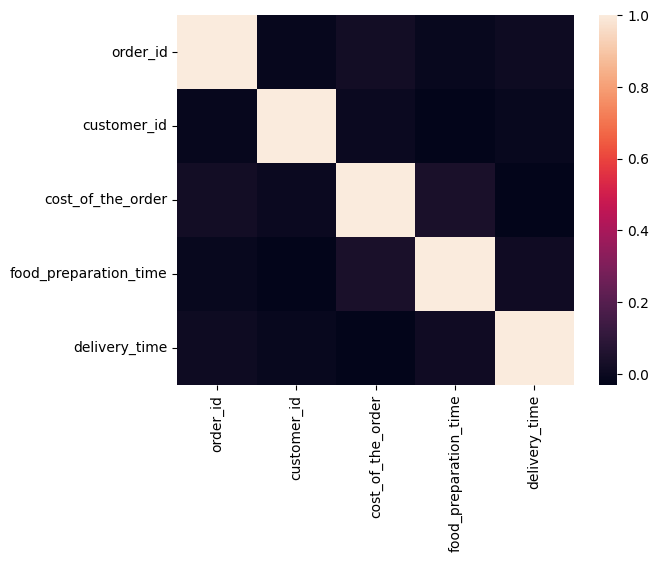

In [ ]:
# find the correlations between numerical data and plot it

data = df[df.select_dtypes(include= np.number).columns.tolist()].corr()

sns.heatmap(data = data)
plt.plot()


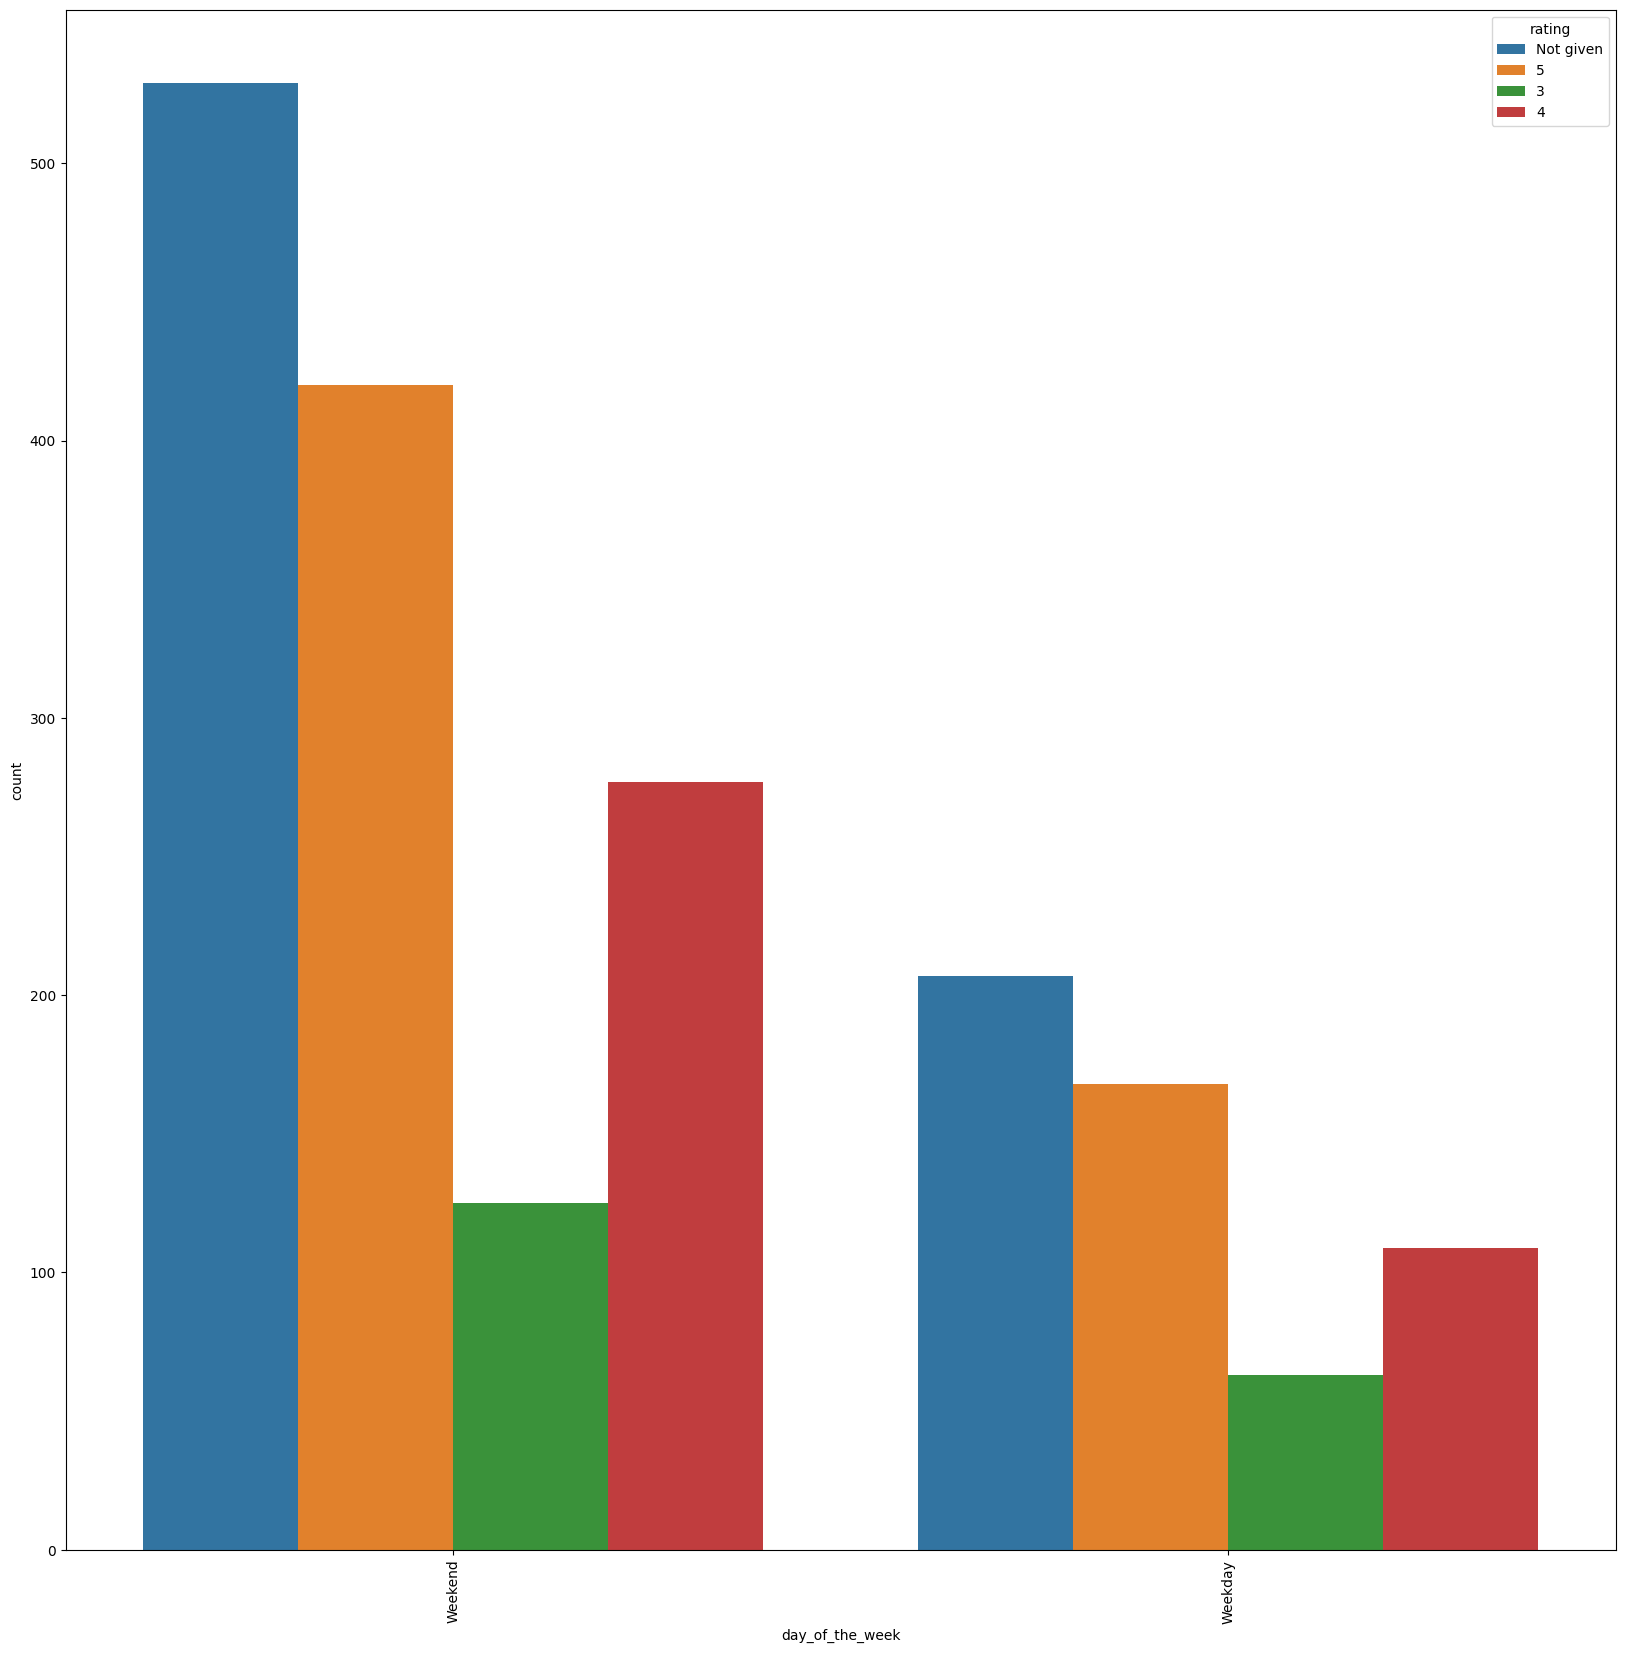

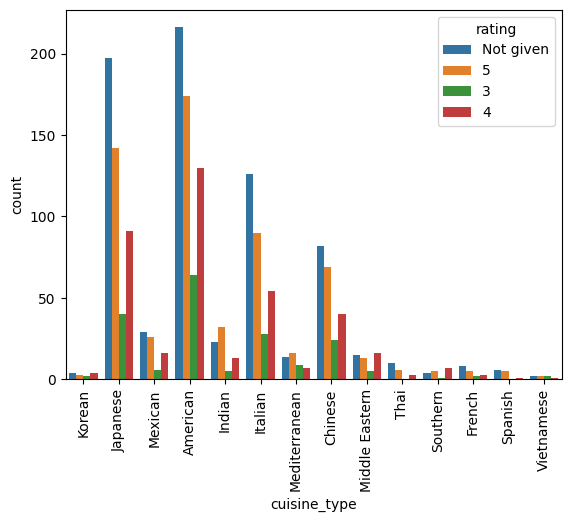

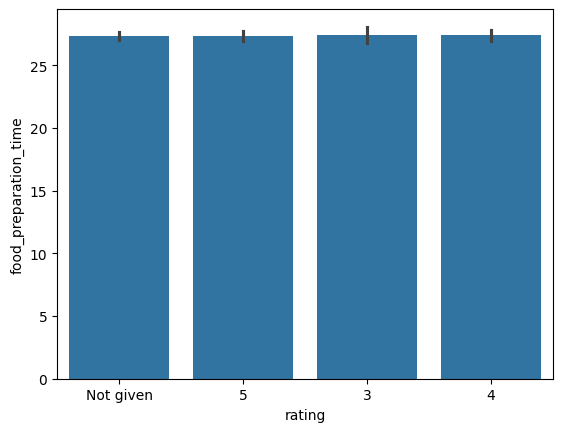

<Axes: xlabel='rating', ylabel='delivery_time'>

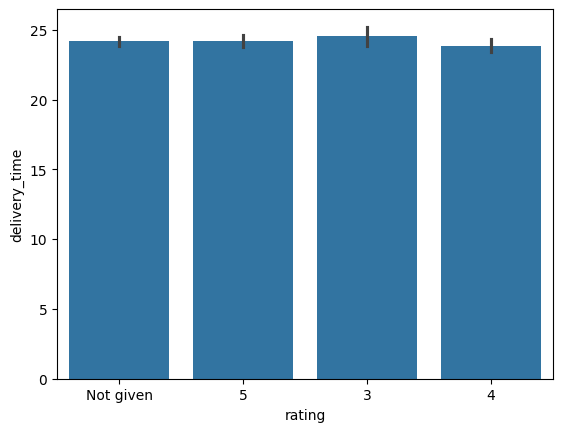

In [ ]:
# comparing what affects rating

plt.figure(figsize = (20,20))
sns.countplot(data = df, x = 'day_of_the_week', hue = 'rating')
plt.xticks(rotation = 90)
plt.show()

plt.xticks(rotation = 90)
sns.countplot(data = df, x = 'cuisine_type', hue = 'rating')
plt.show()

sns.barplot(data = df, x = 'rating', y = 'food_preparation_time')
plt.show()

sns.barplot(data = df, x = 'rating', y = 'delivery_time')

#### Observations: no correlation between any of the numerical data, no correcation between day of week to rating distribution, no correlation between rating and cuisine type, time to get food does not affect rating.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# Filter df to exclude rows where "rating" is "Not given"
data = df[df["rating"] != "Not given"]

# Filter data to include restaurants with more than 50 ratings
valid = []
value_count = df['restaurant_name'].value_counts()
for name in df.restaurant_name.unique():
  count_of_value = value_count.get(name, 0)
  if count_of_value > 50:
    valid.append(name)

#new dataframe that only includes valid restaurants
data = data[data['restaurant_name'].isin(valid)]

data['rating'] = data['rating'].astype(int)

average_ratings = data.groupby('restaurant_name')['rating'].mean()

#filter
highly_rated_restaurants = average_ratings[average_ratings > 4]
highly_rated_restaurants


restaurant_name
Blue Ribbon Fried Chicken    4.328125
Blue Ribbon Sushi            4.219178
Parm                         4.128205
RedFarm Broadway             4.243902
RedFarm Hudson               4.176471
Shake Shack                  4.278195
The Meatball Shop            4.511905
Name: rating, dtype: float64

In [ ]:
#find the restaurants that are popular cuisine and have high ratings
data = data[data['cuisine_type'].isin(['American',
'Japanese','Italian','Chinese','Mexican','Indian'])]

average_ratings = data.groupby('restaurant_name')['rating'].mean()

highly_rated_restaurants = average_ratings[average_ratings > 4]
highly_rated_restaurants

restaurant_name
Blue Ribbon Fried Chicken    4.328125
Blue Ribbon Sushi            4.219178
Parm                         4.128205
RedFarm Broadway             4.243902
RedFarm Hudson               4.176471
Shake Shack                  4.278195
The Meatball Shop            4.511905
Name: rating, dtype: float64

#### Observations: Blue Ribbon Fried Chicken    4.328125
Blue Ribbon Sushi            =4.219178

Parm                         =4.128205

RedFarm Broadway             =4.243902

RedFarm Hudson               =4.176471

Shake Shack                  =4.278195

The Meatball Shop            =4.511905


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
 data_over_20 = df[df['cost_of_the_order'] > 20]

 data_over_5 = df[df['cost_of_the_order'] <= 20]

 data_over_5 = data_over_5[data_over_5['cost_of_the_order'] > 5]



 profit = data_over_5['cost_of_the_order'].sum() * .15 + data_over_20['cost_of_the_order'].sum() * .25

 round(profit,2)


6166.3

#### Observations: 6166.30 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
 data_over_60 = df[(df['delivery_time'] + df['food_preparation_time']) >= 60]
 data_over_60.value_counts().sum()

245

#### Observations: 245


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
Weekday = df[df['day_of_the_week'] == 'Weekday']

Weekend = df[df['day_of_the_week'] == 'Weekend']

print(Weekend['delivery_time'].mean())
print(Weekday['delivery_time'].mean())

22.4700222057735
28.340036563071298


#### Observations: on average it takes around six minutes longer to deliver food on a weekday vs a weekend


### Conclusion and Recommendations

In [ ]:
!pip install nbconvert


In [ ]:
%cd "/content/drive/My Drive/ColabNotebooks/week2"
!jupyter nbconvert --to html Aiden_Shaffer_FDS_Project_LearnerNotebook_FullCode.ipynb

/content/drive/My Drive/ColabNotebooks/week2
[NbConvertApp] Converting notebook Aiden_Shaffer_FDS_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] Writing 1045171 bytes to Aiden_Shaffer_FDS_Project_LearnerNotebook_FullCode.html


### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  there wasnt much correlation between delievery time/food prep time and rating. there isnt much correlation about any of the data... the most we could observe is what food groups are ordered the most frequently, and what restaurants have the potential to bring in the most business

### Recommendations:

*  i would recommend advertising the types of food that bring in the most business, and specifically those that have the highest rating. so in this case, i would advertise the companies: Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Parm, RedFarm Broadway, RedFarm Hudson, Shake Shack, The Meatball Shop as they all have ratings above 4 and serve the most popular types of food.

* if you wanted to work on advertising miney, you could appeal to the lower sales groups and do pomotions for them to get more customers and the company could pay you for the business you bring

---